In [147]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [148]:
# Importing the dataset
wine = pd.read_csv('data.csv')
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='fixed acidity'>

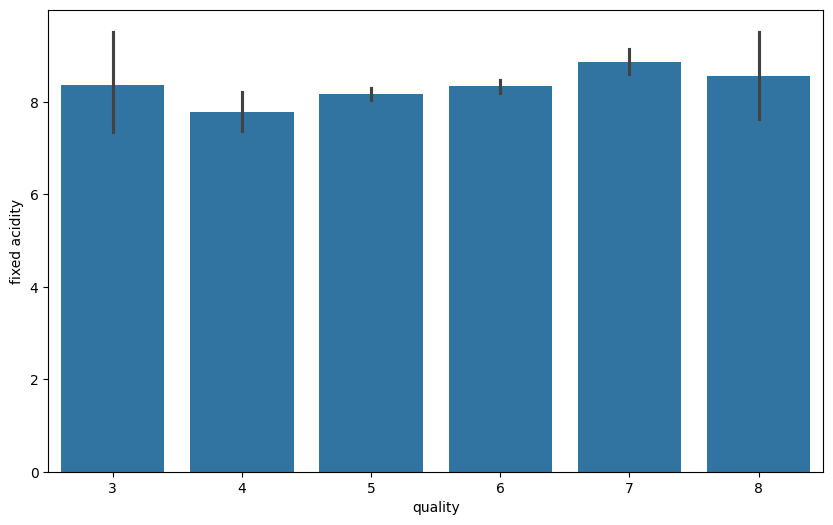

In [149]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

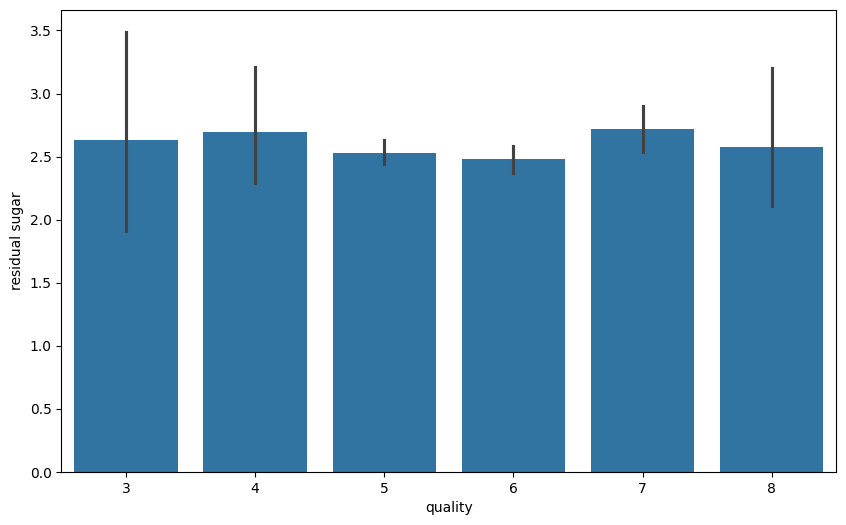

In [150]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine) 

In [151]:
# Putting quality into bins
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [152]:
# Encoding the quality bins
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [153]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [154]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [155]:
# Scaling the variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [156]:
# Trying Random Forest Classification
rfc = RandomForestClassifier(n_estimators=200,n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [157]:
# Evaluating the model
print("Accuracy score =",accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))


Accuracy score = 0.8875
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320



The Random Forest Classifier achieves an impressive accuracy of 88.75% at predicting the wine quality.

In [158]:
# Trying Support Vector Machine
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [159]:
# Evaluating the model
print("Accuracy score =",accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



The Support Vector Classifier achieves a lower accuracy of 87.5% at predicting the wine quality.

In [160]:
# Setting up hyperparameter tuning for SVC
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc,param, cv=10, n_jobs=-1)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [161]:
# Using and evaluating grid searched model
pred = grid_svc.predict(X_test)
print("Accuracy score =", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy score = 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



The Grid Search Cross-validated Support Vector Classifier achieves the highest accuracy of 89.7% at predicting the wine quality.